<a href="https://colab.research.google.com/github/timlok123/PHYS3151-Machine-Learning-in-Physics-2025/blob/main/support-vector-machine/SVMIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
!git clone https://github.com/timlok123/PHYS3151-Machine-Learning-in-Physics-2025.git

fatal: destination path 'PHYS3151-Machine-Learning-in-Physics-2025' already exists and is not an empty directory.


In [9]:
df = pd.read_csv('/content/PHYS3151-Machine-Learning-in-Physics-2025/support-vector-machine/Iris.csv')
df = df.drop(['Id'],axis=1)
target = df['Species']
s = set()
for val in target:
    s.add(val)
s = list(s)
rows = list(range(100,150))
df = df.drop(df.index[rows])

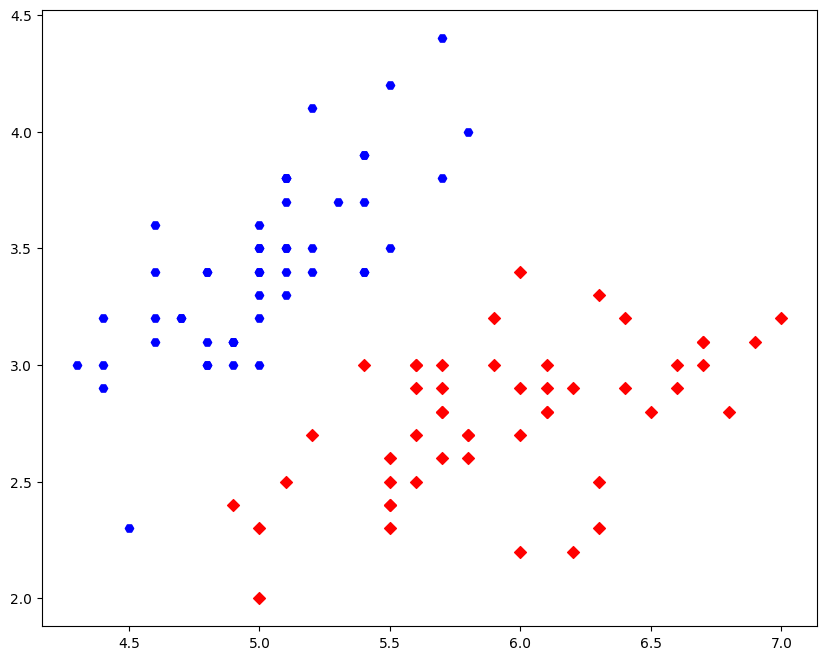

In [10]:
x = df['SepalLengthCm']
y = df['SepalWidthCm']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(10,8))
plt.scatter(setosa_x, setosa_y, marker='H', color='blue')
plt.scatter(versicolor_x, versicolor_y, marker='D', color='red')
plt.show()

In [11]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

## Drop the other two features and extract the target values

df = df.drop(['PetalLengthCm','PetalWidthCm'],axis=1)
Y = []
target = df['Species']
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(-1)
    else:
        Y.append(1)
df = df.drop(['Species'],axis=1)
X = df.values.tolist()

## Shuffle and split the data into training and testing set
X, Y = shuffle(X,Y)
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.reshape(90,1)
y_test = y_test.reshape(10,1)

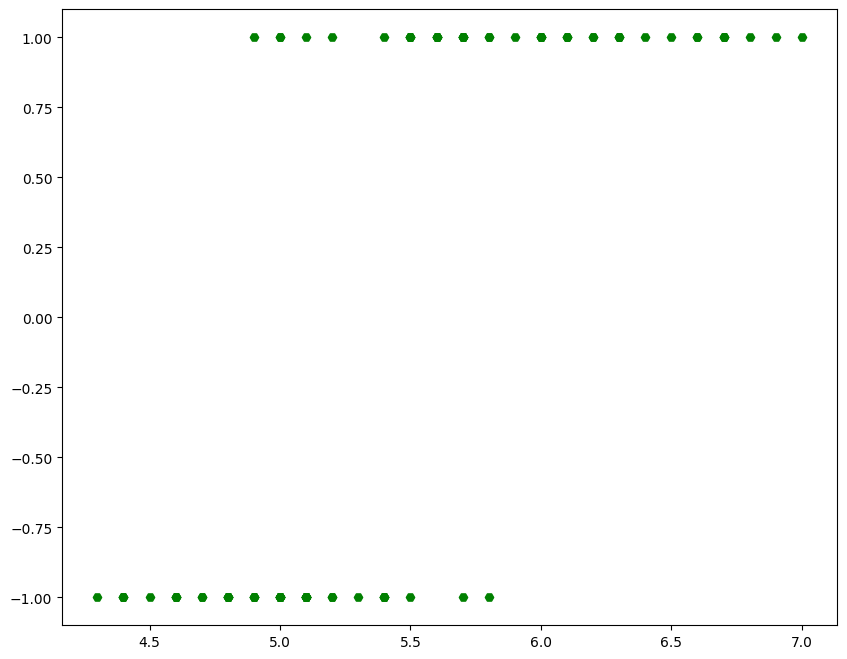

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(x_train[:,0], y_train, marker = 'H', color='Green')
plt.show()

In [13]:
# start the gradient descent

train_f1 = x_train[:,0]
train_f2 = x_train[:,1]

train_f0 = np.ones((90,1))
train_f1 = train_f1.reshape(90,1)
train_f2 = train_f2.reshape(90,1)

#w1 = np.zeros((90,1))
#w2 = np.zeros((90,1))
#w0 = np.zeros((90,1))

w1 = 0
w2 = 0
w0 = 0

epochs = 1
alpha = 0.01

while (epochs < 30000):
    y = w1 * train_f1 + w2 * train_f2 + w0
    prod = y * y_train
 #   print(epochs)
    count = 0
    for val in prod:
        if (val >= 1):
            cost = 0
            w0 = w0
            w1 = w1 - alpha * ( 1/epochs * w1)
            w2 = w2 - alpha * ( 1/epochs * w2)
        else:
            cost = 1 - val
            w0 = w0 + alpha * (train_f0[count] * y_train[count])
            w1 = w1 - alpha * (1/epochs * w1 - train_f1[count] * y_train[count])
            w2 = w2 - alpha * (1/epochs * w2 - train_f2[count] * y_train[count])
        count += 1
    epochs += 1

print(prod.shape)
print(prod)
print(w1,w2,w0)

(90, 1)
[[ 1.50865774]
 [ 6.08853326]
 [ 9.71749651]
 [ 4.12193223]
 [ 1.15398514]
 [ 1.12002485]
 [ 8.57332016]
 [ 5.79863715]
 [ 5.57351753]
 [ 1.50865774]
 [ 6.24994179]
 [ 5.50874104]
 [ 7.31499894]
 [ 5.86341364]
 [10.25002509]
 [11.94424285]
 [ 6.71769388]
 [10.39602552]
 [10.44328916]
 [ 3.25013915]
 [10.34665713]
 [ 5.33088506]
 [ 4.44368389]
 [ 4.3151963 ]
 [ 5.04098895]
 [ 7.34685449]
 [ 5.50874104]
 [ 5.70200511]
 [ 1.97640983]
 [11.36234589]
 [ 3.15350711]
 [ 8.89507183]
 [ 6.20267814]
 [ 2.38045082]
 [ 4.6544608 ]
 [ 4.87958043]
 [ 3.34677119]
 [ 2.45957001]
 [ 3.37862674]
 [ 3.9759318 ]
 [10.68592163]
 [ 6.20267814]
 [ 4.3151963 ]
 [ 1.44388125]
 [ 5.33088506]
 [ 2.45957001]
 [12.42740304]
 [ 4.39642024]
 [ 2.84609816]
 [ 6.05667771]
 [ 1.4120257 ]
 [ 7.50826301]
 [ 3.34677119]
 [ 4.41182834]
 [ 2.5089384 ]
 [ 9.81412855]
 [ 6.20267814]
 [11.84761082]
 [ 5.67014956]
 [ 3.58940365]
 [ 1.89518589]
 [ 6.42779776]
 [ 3.81452328]
 [11.26571385]
 [ 1.00798471]
 [ 3.25013915]
 [

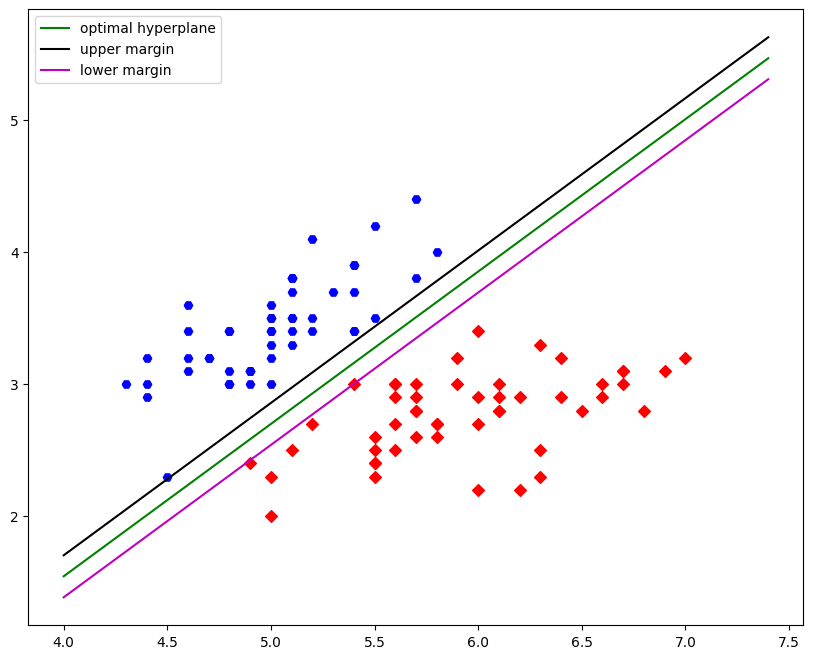

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(setosa_x, setosa_y, marker='H', color='blue')
plt.scatter(versicolor_x, versicolor_y, marker='D', color='red')
x = np.arange(4,7.5,0.1)
y = -(w1[-1]/w2[-1])*x - w0[-1]/w2[-1]
y1 = -(w1[-1]/w2[-1])*x - (1 + w0[-1])/w2[-1]
y2 = -(w1[-1]/w2[-1])*x - (-1 + w0[-1])/w2[-1]
plt.plot(x,y,label='optimal hyperplane', color = 'Green')
plt.plot(x,y1,label='upper margin', color = 'k')
plt.plot(x,y2,label='lower margin', color = 'm')
plt.legend()
plt.show()